In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
#import pymc as pm
plt.rcParams["figure.figsize"] = (20,10)

### Logistic Function
\begin{equation*}
P(x) =\frac{ 1 }{e^{x*\beta}+\alpha}
\end{equation*}

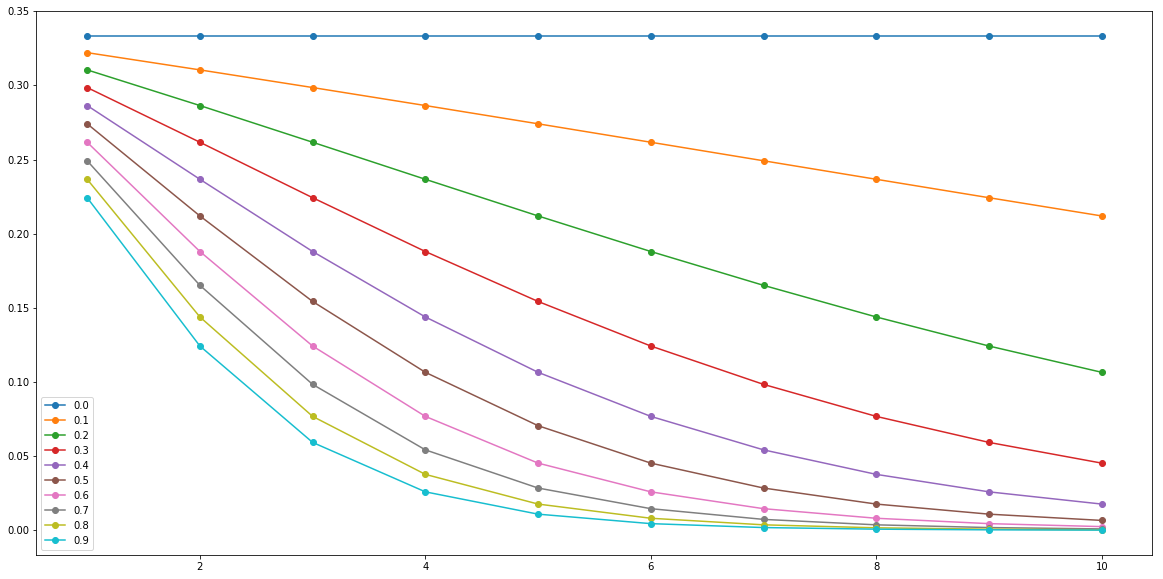

In [4]:
def logistic(x, alpha=1, beta=0.1):
    
    return 1/(1+ np.exp(x*beta)+alpha)

for b in range(0,10):
    b = b/10
    x_list = [1,2,3,4,5,6,7,8,9,10]
    r = []
    for x in x_list:
        r.append(logistic(x, beta=b))
    
    plt.plot(x_list, r, '-o', label=str(b))
plt.legend()
plt.show()

### Poisson Distribution
\begin{equation*}
P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots, \; \; \lambda \in \mathbb{R}_{>0}
\end{equation*}

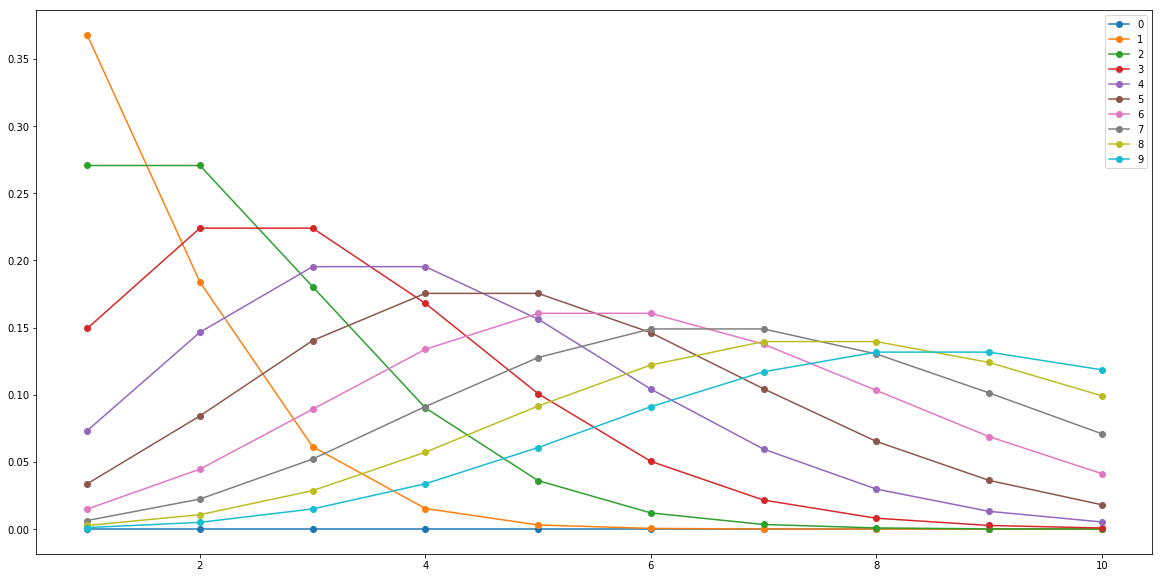

In [5]:
def poisson(kappa, lambd=10):
    return (np.power(lambd,kappa) * np.exp(-lambd)) /math.factorial(kappa)

for l in range(0,10):
    kappa_list = [1,2,3,4,5,6,7,8,9,10]
    r = []
    for k in kappa_list:
        r.append(poisson(k, l))
    
    plt.plot(kappa_list, r, '-o', label=str(l))
plt.legend()
plt.show()

### Beta Distribution
can also use scipy's stats.beta.pdf

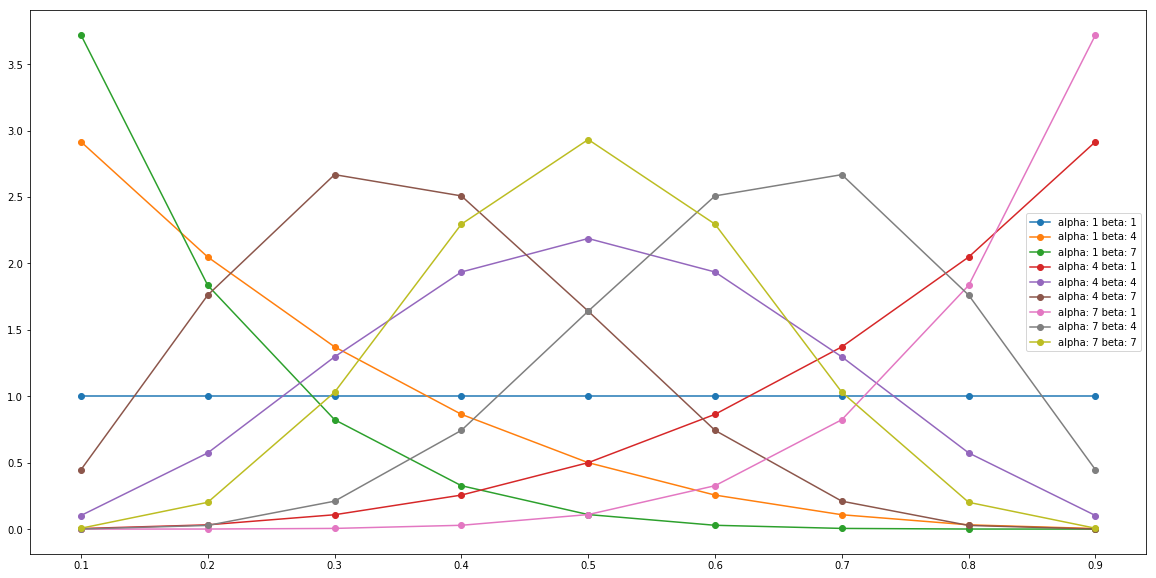

In [28]:
alpha_vals = np.arange(1,10,3)
beta_vals = np.arange(1,10,3)

def beta_func(a,b):
    beta = math.gamma(a)*math.gamma(b)/math.gamma(a+b)
    return beta


for alpha in alpha_vals:
    for beta in beta_vals:        
        y = []
        x_list = []
        for x in np.arange(0.1,1,0.1):
            x_list.append(x)
            y.append(1 / beta_func(alpha, beta) * math.pow(x,alpha-1) * math.pow(1-x,beta-1))
        plt.plot(x_list, y, '-o', label='alpha: '+str(alpha)+' beta: '+str(beta))
plt.legend()
plt.show()

### Example: Inferring behaviour from text-message data
Let's try to model a more interesting example, one that concerns the rate at which a user sends and receives text messages, from [here](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC2.ipynb). We can model using a Poisson, with messages count by day as:
\begin{equation*}
C_i \sim \text{Poisson}(\lambda)
\end{equation*}

We need to infer \lambda, lets assign to it a prior using the exponential distribution: 
\begin{equation*}
\lambda \sim Exp(\alpha)
\end{equation*}
lets use PyMC!

In [11]:

count_data = np.loadtxt("files/textdata.csv")
alpha = 1.0 / count_data.mean()  
                               
lambd = pm.Exponential("lambda", alpha)

observation = pm.Poisson("obs", lambd, value=count_data, observed=True)

model = pm.Model([observation, lambd])

In [12]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 1.0 sec

In [14]:
l_samples = mcmc.trace('lambda')[:]

/Users/lorenzoriches/miniconda3/envs/stats/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([  1.98468623e-03,   4.96171558e-03,   0.00000000e+00,
          6.94640181e-03,   1.63736614e-02,   3.15068939e-02,
          7.46738195e-02,   1.13623287e-01,   2.08143969e-01,
          2.98447192e-01,   3.55258835e-01,   5.33384425e-01,
          6.69087346e-01,   7.30116447e-01,   7.52940339e-01,
          8.16202213e-01,   6.70079689e-01,   5.99871413e-01,
          5.02869874e-01,   3.63197580e-01,   2.74879043e-01,
          1.60015327e-01,   1.25035233e-01,   7.26891332e-02,
          3.49800948e-02,   9.42725960e-03,   6.94640181e-03,
          5.70597292e-03,   2.97702935e-03,   2.48085779e-04]),
 array([ 17.72739215,  17.86175428,  17.9961164 ,  18.13047853,
         18.26484066,  18.39920279,  18.53356492,  18.66792705,
         18.80228918,  18.9366513 ,  19.07101343,  19.20537556,
         19.33973769,  19.47409982,  19.60846195,  19.74282408,
         19.87718621,  20.01154833,  20.14591046,  20.28027259,
         20.41463472,  20.54899685,  20.68335898,  20.8177

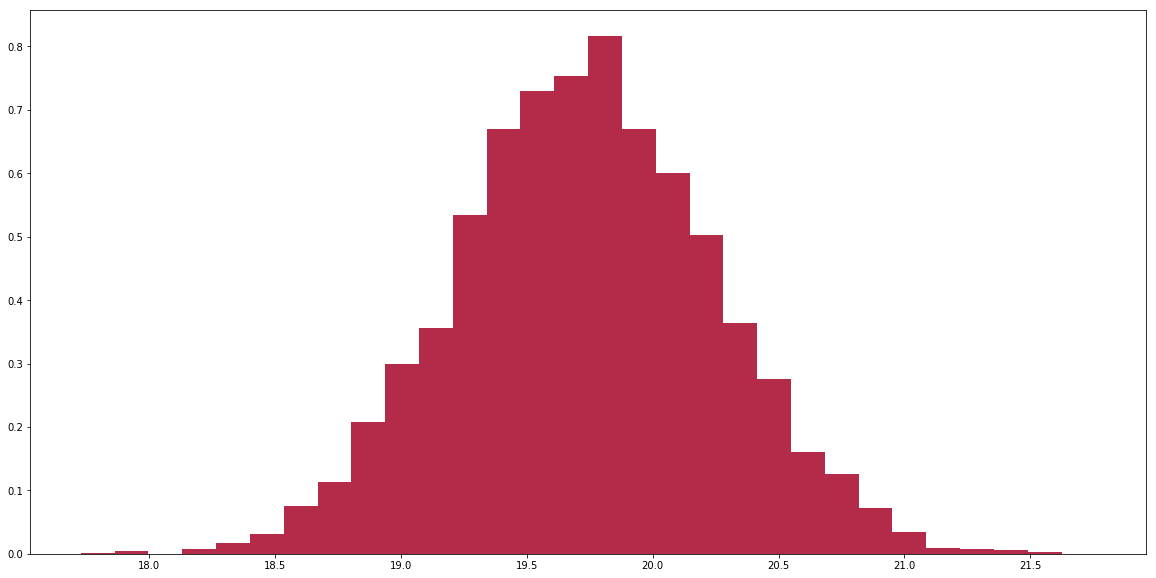

In [16]:
plt.hist(l_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)